# FAL-C Solar atmosphere model

This notebok is based on materials prepared by B. Rutten availible at webpage: https://www.staff.science.uu.nl/~rutte101/.

## FAL-C exploration

We will explore the solar atmosphere model FALC (average quiet Sun) by [Fontenla at al. (1993)](https://ui.adsabs.harvard.edu/abs/1993ApJ...406..319F/abstract). In the series of three artivels they describe plane parallel, static, homogenous model of solar photosphere and chromosphere. Let's take a look at the model itself:

In [18]:
import pandas as pd

In [19]:
falc_model_filename= "data/falc.dat"
falc= pd.read_csv(falc_model_filename, 
                  delim_whitespace=True, 
                  index_col=None,
                  comment='#')
# height tau_500 colmass  temp v_turb n_Htotal n_proton n_electron pressure  p_gas/p density
# [km]   dimless [g/cm^2] [K]  [km/s] [cm^-3]  [cm^-3]  [cm^-3]    [dyn/cm2] ratio   [g/cm^3]
falc.head()

,height,tau_500,colmass,temp,v_turb,n_Htotal,n_proton,n_electron,pressure,p_gas/p,density
0,2218.20,0.000000e+00,0.000007,100000,11.73,5.575000e+09,5.575000e+09,6.665000e+09,0.1857,0.952,1.306000e-14
1,2216.50,7.696000e-10,0.000007,95600,11.65,5.838000e+09,5.837000e+09,6.947000e+09,0.1857,0.950,1.368000e-14
2,2214.89,1.531000e-09,0.000007,90816,11.56,6.151000e+09,6.150000e+09,7.284000e+09,0.1858,0.948,1.441000e-14
3,2212.77,2.597000e-09,0.000007,83891,11.42,6.668000e+09,6.667000e+09,7.834000e+09,0.1859,0.945,1.562000e-14
4,2210.64,3.754000e-09,0.000007,75934,11.25,7.381000e+09,7.378000e+09,8.576000e+09,0.1860,0.941,1.729000e-14


The first column specifies the height $h$ which is the distance above $\tau_{500}=1$ where $\tau_{500}$, given in the second column, is the radial optical depth in the continuum at $\lambda = 500 \text{nm}$. The quantity $m$ in the third column is the mass of a column with cross-section $1\,\text{cm}^2$ above given location.

### Temperature stratification

Below you can see the temperature stratification of the FALC model. Dashed lines shows convetional boundaries between different layers. 

In [20]:
import matplotlib.pyplot as plt

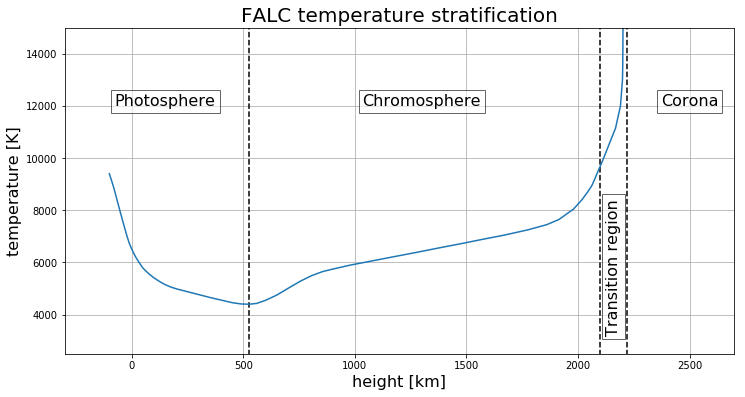

In [80]:
plt.figure(figsize=(12,6))

plt.plot(falc["height"], falc["temp"])

plt.vlines((525, 2100, 2218), ymin=0, ymax=1e5, linestyles='--')

bbox=dict(facecolor='white', alpha=0.6)
plt.text(150, 12000, "Photosphere", fontsize=16, 
         horizontalalignment='center', bbox=bbox)
plt.text(1300,12000, "Chromosphere", fontsize=16, 
         horizontalalignment='center', bbox=bbox)
plt.text(2160,8000 , "Transition region", fontsize=16, 
         horizontalalignment='center', bbox=bbox, rotation=90)
plt.text(2500,12000, "Corona", fontsize=16, 
         horizontalalignment='center', bbox=bbox)

plt.ylim(2500, 15000)
plt.xlim(-300, 2700)
plt.xlabel("height [km]", fontsize=16)
plt.ylabel("temperature [K]", fontsize=16)
plt.title("FALC temperature stratification", fontsize=20)
plt.grid()

### Microturbulent velocity, pressure and density

The microturbulent elocity $v_t$ roughly accounts for the Doppler broadening that is observed to exceed the thermal broadening of lines formed at various heights. The total pressure $P_{tot}$ is the sum of the gas pressure $P_{gas}$ and the corresponding turbulent pressure $\rho v_t^2/2$ where $\rho$ is the gas density (last column).

### Hydrogen, free proton and free electron density

The tables also lists the total hydrogen density $n_H$, the proton density $n_P$, and the free electron density $n_e$. Given the $T$ and $v_t$, these number densities and other quantities were determined by redquiring hydrostatic equilibrium and evaludationg the ionisation balances by solving the coupled radiative transfer and statistical equilibrum equations (Qithout assuming LTE). The adopted helium-to-hydrogen abundance ratio is $N_{He}/N_H = 0.1$. The relative abundances of other elements came from [Anders and Grevesse (1989)](https://ui.adsabs.harvard.edu/abs/1989GeCoA..53..197A/abstract). Nowadays one would use those of [Asplund et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009ARA%26A..47..481A/abstract).

## Exercises

Constants that you may need are placed at the end of the notebook ([link](#constants)). In case you don't know how to attack the problem first try to search the B. Rutten [notes](https://www.staff.science.uu.nl/~rutte101/rrweb/rjr-pubs/2003rtsa.book.....R.pdf).

1. Plot the total pressure $p_{total}$ against the column mass $m$, both lineary and logarithmically. You will find that they scale linearly. Explain what assumption has caused $p_{total} = c\,m$ and determine the value of the solar surface gravity $g_{surface} = c$ that went into the FALC-producing code.

2. [Fontenla et al. (1993)](https://ui.adsabs.harvard.edu/abs/1993ApJ...406..319F/abstract) also assumed complete mixing, i.e., the same element mix at all heights. Check this by plotting the ratio of the hydrogen mass density to the total mass density against height (the hydrogen atom mass is $m_H = 1.67352\times10^{-24} \text{g}$). Then add helium to hydrogen using their abundance and mass ratios ($N_{He} /N_{H} = 0.1$, $m_{He} = 3.97 m_H$ ), and estimate the fraction of the total mass density made up by the remaining elements in the model mix (the “metals”).

3. Plot the column mass against height. The curve becomes nearly straight when you make the y-axis logarithmic. Why is that? Why isn’t it exactly straight?

4. Plot the gas density against height. Estimate the density scale height $H_\rho$ in $\rho \approx \rho(0) \exp(−h/H_\rho )$ in the photosphere.

5. Compute the gas pressure and plot it against height. Overplot the product $(n_H + n_e ) kT$ . Plot the ratio of the two curves to show their differences. Do the differences measure deviations from the ideal gas law or something else? Now add the helium density $N_{He}$ to the product and enlarge the deviations. Comments?

6. Plot the total hydrogen density against height and overplot curves for the electron density, the proton density, and the density of the electrons that do not result from hydrogen ionization. Explain their behavior. The last curve is parallel to the hydrogen density over a considerable height range. What does that imply? And what happens at larger height?

7. Plot the ionization fraction of hydrogen logarithmically against height. Why does this curve look like the temperature stratification plotted above? And why is it tilted with respect to that?

8. ***** Let us now compare the photon and particle densities. In thermodynamic equilibrium (TE) the radiation is isotropic with intensity $I_\nu = B_\nu$ and has total energy density (Stefan Boltzmann)
$$
u = \frac{1}{c} \iint B_\nu d\Omega d\nu = \frac{4\sigma}{c}T^4
$$
so that the total photon density for isotropic TE radiation is given, with $u_\nu = du/d\nu$, $T$ in K and $N_{phot}$ in photons per $\text{cm}^3$, by
$$
N_{phot} = \int_0^\infty \frac{u_\nu}{h\nu}d\nu \approx 20 T^3
$$
This equation gives a reasonable estimate for the photon density at the deepest model location, why? Compute the value there and compare it to the hydrogen density. Why is the equation not valid higher ut the atmosphere? The photon density there is $N_{phot}\approx20T^3_{eff}/2\pi$ with $T_{eff}=5770$ K the effective solar temperature. Compare it to the hydrogen density at the highest location in the FALC model. The medium there is insensitive to these photons (except those at the center wavelength of the hydrogen Ly$\alpha$ line), why?

## Solutions

In [1]:
# ...

## Constants

* 1 erg = $10^{-7}$ J
* 1 dyne cm$^{-2}$ = 0.1 Pascal = $10^{-6}$ bar = $9.8693\times10^{-4}$ atm
* 1 eV = $1.60219 \times 10^{-12}$ erg
* photon energy = E [eV] = 12398.55/$\lambda$ [Angstrom]